In [ ]:
import numpy as np
from PIL import Image
# import warnings
import matplotlib.pyplot as plt
import os
from skimage.io import imread, imshow
from skimage.transform import resize
from tqdm import tqdm
import random
import tensorflow as tf
import cv2
from grayscaleconversionlatest import BinarizeImage
# warnings.filterwarnings('error')

In [ ]:
def ConvertToGrayScale(imageArray):
    grayScaleArray = 0.299*imageArray[:,:,0] + 0.587*imageArray[:,:,1] + 0.114*imageArray[:,:,2]
    return grayScaleArray.astype('uint8')

def Imshow(imgArr1, imgArr2):
    f, (plot1, plot2) = plt.subplots(1, 2)
    plot1.imshow(imgArr1, cmap='gray', vmin=0, vmax=255)
    plot2.imshow(imgArr2, cmap='gray', vmin=0, vmax=255)
    plt.show()

def PILImshow(imgArr1, imgArr2):
    imgArr1 = imgArr1.astype('uint8')
    imgArr2 = imgArr2.astype('uint8')
    Image.fromarray( imgArr1).show()
    # Image.fromarray( imgArr2).show()
    # Image.fromarray( imgArr1 , 'L').save("C:\\Users\\ashis\\Documents\\Ashish\\EPR420\\Code\\Gray_Scale_Conversion\\Images\\imgArr1.png")
    # Image.fromarray( imgArr2 , 'L').save("C:\\Users\\ashis\\Documents\\Ashish\\EPR420\\Code\\Gray_Scale_Conversion\\Images\\imgArr2.png")


def BinImshow(imgArr1, flip):
    if(flip):
        imgArr1 = np.logical_not(imgArr1)
    imgArr1 = imgArr1*255
    imgArr1 = imgArr1.astype('uint8')
    f, (plot1) = plt.subplots(1, 1)
    plot1.imshow(imgArr1, cmap='gray', vmin=0, vmax=255)


def BinPILImshow(imgArr1, flip):
    if (flip):
        imgArr1 = np.logical_not(imgArr1)
    imgArr1 = imgArr1*255
    imgArr1 = imgArr1.astype('uint8')
    Image.fromarray( imgArr1 , 'L').show()

In [ ]:
IMG_WIDTH = 640
IMG_HEIGHT = 1280
IMG_CHANNELS = 1

#Relative paths of images and masks
Image_PATH =  ".\\Images"
Masks_PATH =  ".\\Masks"


In [52]:
# testImage = ConvertToGrayScale(imread(".\\TestImages\\Screenshot 2023-05-15 130851.png"))
# imagePath = ".\\TestImages\\00000808.png"
# imagePath = ".\\TestImages\\00001188.png"
imagePath = ".\\TestImages\\CyrillicRecipie1.png"
testImage = ConvertToGrayScale(imread(imagePath))
# testImage = resize(testImage, (testImage.shape[0]*2, testImage.shape[1]*2), mode='constant', preserve_range = True)

testImage = BinarizeImage(testImage, 0)
testImage = testImage * 255

# imshow(testImage, cmap='gray')
# testImage = ConvertToGrayScale(imread(imagePath))
imshow(testImage, cmap='gray')

PILImshow(testImage, testImage)

Max = 196 Min = 19 R= 88.5


c:\Users\ashis\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


In [53]:
totalLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(testImage.astype(np.uint8), 4)

print("totalLabels", totalLabels)
print("labels", labels)

colors = np.random.randint(0, 255, size =(totalLabels, 3), dtype=np.uint8)
colors[0] =[0,0,0]

colored_components = colors[labels]

imshow(colored_components)
PILImshow(colored_components, colored_components)

# cv2.imshow('Colored Img', colored_components)

totalLabels 1341
labels [[ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  2]
 [ 0  0  0 ...  0  0  2]
 ...
 [ 0  0  0 ...  0 43  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  0 ... 43 43  0]]


In [54]:
"""
for example to find the left most boundary of each connected component, take each column of 
the image from the left and check if a new label is present in the column. If so then add the
new label to the list variable 'foundLabels_LeftMost'. Also record the column number in which
the new label was found. Add it to the list variable 'LeftBoundaries' in the index of the label
found. e.g if the label 37 was found coumn 3 then 3 is saved in the 37th index of LeftBoundaries
and 37 is added to the list of found labels in 'foundLabels_LeftMost'. 
This was then done for each of the four directions: Left, right, top, and bottom. 
"""


foundLabels_LeftMost = []
foundLabels_RightMost = []
foundLabels_TopMost = []
foundLabels_BottomMost = []

LeftBoundaries = np.zeros(totalLabels)
RightBoundaries = np.zeros(totalLabels)
TopBoundaries = np.zeros(totalLabels)
BottomBoundaries = np.zeros(totalLabels)

# Finding left most boundaries:
for columnVal in range(0, len(labels[0])):
    column = labels[:, columnVal]

    for i in range(len(column)):
        if column[i] not in foundLabels_LeftMost:
            LeftBoundaries[column[i]] = columnVal
            # print("new label ", column[i], " found! Column:", columnVal)
            foundLabels_LeftMost.append(column[i])


# Finding right most boundaries:
for columnVal in range(len(labels[0])-1, -1, -1):
    column = labels[:, columnVal]

    for i in range(len(column)):
        if column[i] not in foundLabels_RightMost:
            RightBoundaries[column[i]] = columnVal
            # print("new label ", column[i], " found! Column:", columnVal)
            foundLabels_RightMost.append(column[i])



# Finding top most boundaries:
for rowVal in range(0, len(labels)):
    row = labels[rowVal, :]

    for i in range(len(row)):
        if row[i] not in foundLabels_TopMost:
            TopBoundaries[row[i]] = rowVal
            foundLabels_TopMost.append(row[i])


# Finding Bottom most boundaries:
for rowVal in range(len(labels)-1, -1, -1):
    row = labels[rowVal, :]

    for i in range(len(row)):
        if row[i] not in foundLabels_BottomMost:
            BottomBoundaries[row[i]] = rowVal
            foundLabels_BottomMost.append(row[i])


LeftBoundaries = LeftBoundaries.astype(int)
RightBoundaries = RightBoundaries.astype(int)
TopBoundaries = TopBoundaries.astype(int)
BottomBoundaries = BottomBoundaries.astype(int)


#Draw Circles on image where bounding boxes co-ordinates should be"
# https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
for i in range(0, totalLabels):
    start_point = (LeftBoundaries[i], TopBoundaries[i])
    end_point = (RightBoundaries[i], BottomBoundaries[i])
    color = (255, 0, 0)
    thickness = 2
    image = cv2.rectangle(colored_components, start_point, end_point, color, thickness)

imshow(image)
PILImshow(image, image)

# After all of this the bounding boxes for the textlines have been located.

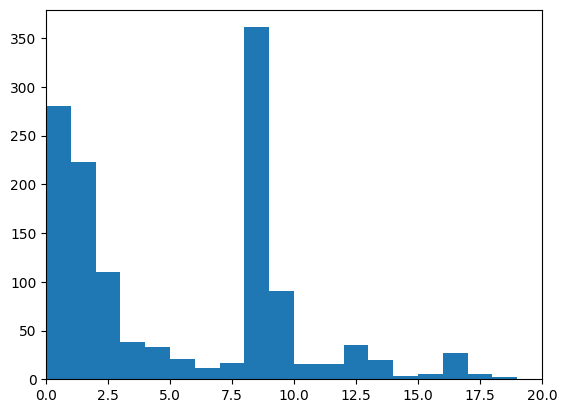

[871 871   8 ...   4   1   1]


In [56]:
#Obtain histogram of all the heights of the connected components

heights =  BottomBoundaries - TopBoundaries

#specify bin width to use
w=1

plt.rcParams.update(plt.rcParamsDefault)
plt.hist(heights, bins=np.arange(min(heights), max(heights) + w, w))
plt.xlim(0,20)
plt.show()

print(heights)

In [ ]:
# #Binarize oiginal image to prepare for word segmentation:
testImage = ConvertToGrayScale(imread(imagePath))
BinarizedImage = BinarizeImage(testImage, 0)
PILImshow(BinarizedImage, testImage)
print(BinarizedImage.shape)
BinPILImshow(BinarizedImage, 1)

In [ ]:
def returnNumbersOnly(inputArr):
    NumberOnlyList = np.array([])
    for j in range(0, len(inputArr)):
        # print(i)
        if isinstance(inputArr[j], int) == True:
            NumberOnlyList = np.append(NumberOnlyList, inputArr[j])
    return NumberOnlyList